## Check the **`stationarity`**, **`trend`** and **`seasonality`** of the given data.

**Code Credits**: [Mudit Golchha](https://github.com/mudit2004)

#### A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future. However, there are other aspects that come into play when dealing with time series.

    -> Is it stationary?
    -> Is there a seasonality?
    -> Is the target variable autocorrelated?

<div class="alert alert-block alert-info">
<b>Aim:</b> To introduce different characteristics of time series and how we can model them to obtain accurate (as much as possible) forecasts.
</div>

**`Autocorrelation`** Informally, is the similarity between observations as a function of the time lag between
them.

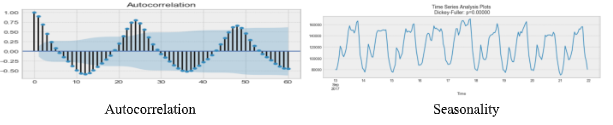

**`Seasonality`** - Seasonality refers to periodic fluctuations. Seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape.

**`Stationarity`** - Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time. Want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

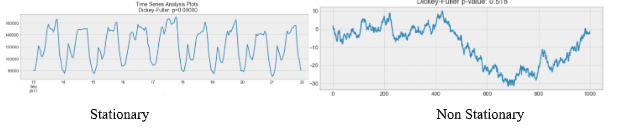

**How to test if a process is stationary?**
Dickey-Fuller - is the statistical test that is run to determine if a time series is stationary or not. It tests the
null hypothesis that a unit root is present. If it is, then p &gt; 0, and the process is not stationary. Otherwise,
p = 0, the null hypothesis is rejected, and the process is considered to be stationary.

Below given properties influence the modeling process significantly.
- Autocorrelation 
- Seasonality
- Stationarity

**Autocorrelation: -**
Autocorrelation is a mathematical representation of the degree of similarity between a given
time series and the lagged version of itself over successive time intervals. In other words, instead
of calculating the correlation between two different series, we calculate the correlation of the
series with an “x” unit lagged version (x∈N) of itself.

Autocorrelation is also known as lagged correlation or serial correlation. The value of
autocorrelation varies between +1 &amp; -1. If the autocorrelation of series is a very small value that
does not mean, there is no correlation. The correlation could be non-linear.

In [8]:
# Given Data
from pandas import read_csv

df = read_csv(r"data.csv" , names = ["Data","Y-1","Y-2","Y-3"])

,Data,Y-1,Y-2,Y-3
0,9.08,NaN,NaN,NaN
1,12.63,9.08,NaN,NaN
2,15.00,12.63,9.08,NaN
3,20.73,15.00,12.63,9.08
4,2.20,20.73,15.00,12.63
5,18.00,2.20,20.73,15.00
6,7.16,18.00,2.20,20.73
7,18.28,7.16,18.00,2.20
8,21.00,18.28,7.16,18.00
9,19.68,21.00,18.28,7.16


### Autocorrelation
- Implementation
> Having done that, let’s see the easier way to do all the calculation in python. First plot the data
and see how our data looks. Now let’s see how to visualize autocorrelation with unit lag = 3 in
python.

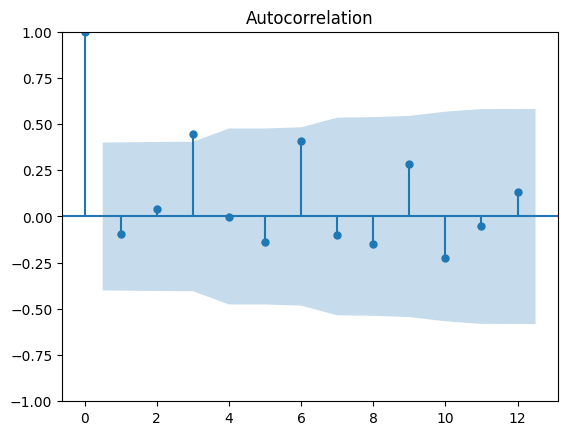

In [15]:
from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = read_csv("data.csv" , names =  ["Data","Y-1","Y-2","Y-3"])
data_column = df["Data"]

plot_acf(data_column)
plt.show()

In [18]:
from statsmodels.tsa.stattools import acf

func , confidence_interval , qstat , pvalue = acf(data_column,nlags = 3)
print(pvalue)

0.445111170739626


**Stationarity:**
>Let’s take the classic example of the birth and airline passenger csv dataset.

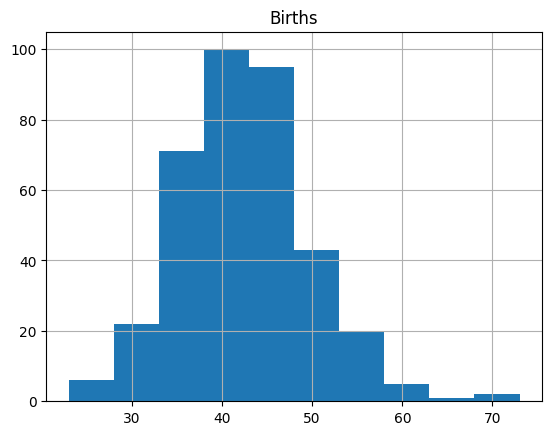

In [20]:
import matplotlib.pyplot as plt

df = read_csv('daily_total_female_births_in_cal.csv' , header = 0 , index_col = 0)
df.hist()
plt.show()

Looking at the histogram we can observe that the data forms a bell curve resulting in a normal
distribution. Now following our summary statistics approach, let’s divide the dataset into two
parts. Since the length of the dataset is an odd number, we’ll round the result of division by 2, to make two parts of the series.

In [22]:
X = df.values
s = round(len(X)/2)
s_1 , s_2 = X[0:s] , X[s:]
s_1_v , s_2_v = s_1.var() , s_2.var()
s_1_m , s_2_m = s_1.mean() , s_2.mean()
print("mean_1 = %f , mean_2 = %f" %(s_1_m , s_2_m))
print("var_1 = %f , var_2 = %f" %(s_1_v , s_2_v))

mean_1 = 39.763736 , mean_2 = 44.185792
var_1 = 49.213410 , var_2 = 48.708651


Looking at the values we could say that the series is stationary as the values are quite close to each other, but if we take the example of the classic airline data then you’ll see that the values are quite far from each other.

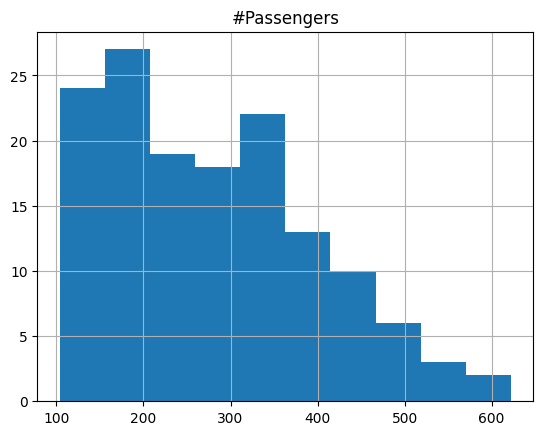

In [24]:
import matplotlib.pyplot as plt

df = read_csv('AirPassengers.csv' , header = 0 , index_col = 0)
df.hist()
plt.show()

Here one thing is quite evident, that the graphs don’t show stationarity, but if we visit the time
series plot for airline passengers again, we can see exponential seasonal growth. To flatten out
this growth we could do a log transform on all the values, plot the transformed values and find
mean and variance. Now the values will be pretty close to each other.

In [25]:
X = df.values
s = round(len(X)/2)
s_1 , s_2 = X[0:s] , X[s:]
s_1_v , s_2_v = s_1.var() , s_2.var()
s_1_m , s_2_m = s_1.mean() , s_2.mean()
print("mean_1 = %f , mean_2 = %f" %(s_1_m , s_2_m))
print("var_1 = %f , var_2 = %f" %(s_1_v , s_2_v))

mean_1 = 182.902778 , mean_2 = 377.694444
var_1 = 2244.087770 , var_2 = 7367.962191


- Statistical tests:
>The most famous one is the Augmented Dickey-Fuller test (ADF). It is also called a unit root
test. ADF uses an autoregressive model and optimizes an information criterion across multiple
different lag values. The simple idea behind this is looking at p-value. If the p-value is &lt;=0.05
then we reject the null hypothesis as the data does not have a unit root and is stationary.

In [29]:
from statsmodels.tsa.stattools import adfuller

df = read_csv('daily_total_female_births_in_cal.csv' , header = 0 , index_col = 0)
X = df.values
r = adfuller(X)

print('ADF Statistic: %f' % r[0])
print('p-value: %f' % r[1])
print('Critical Values:')
for i,j in r[4].items():
    print('\t%s: %.3f' % (i,j))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


- Higher negative value of ADF Statistic means we can reject the null hypothesis.
- The p-value is also less than 0.05 which means the series is stationary and we can reject
the null hypothesis. 
- ADF statistic value is less than value of -3.499 at 1%. This means we can reject the null
hypothesis with a significance level of less than 1%.